In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [225]:
import pandas as pd
CONFIRMED_US = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
DEATHS_US = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"
df = pd.read_csv(CONFIRMED_US)


In [226]:
import matplotlib.pyplot as plt
plt.style.use("presentation")
import seaborn as sns

ndf = df#.loc[df['Province_State']=="Florida"]
ndf.drop(["UID", "iso2", "iso3", "FIPS", "Admin2", "code3", 
          "Lat",  "Long_", "Combined_Key",
          "Country_Region", "Province_State"], axis=1, inplace=True)
# ndf.sum().plot()
y = ndf.sum().values
print(len(y))
# y1 = y[y != 0]
# # print(y1)
# print(y[y != 0], np.array(y).shape)
# x = list(range(len(y)))
# x1 = list(range(len(y1)))
# plt.plot(y)
# plt.plot(y1)


95


In [220]:
#Obtain estimate
def get_error(a,b):
    error = 0
    for index in x1:
        error += abs((a**(x1[index]-b)) - (y1[index]))
    return error / len(x)

def element_same_check(history):
    for element in history:
        if round(element) != history[0]:
            return False
    return True

def increasing_check(history):
    if history[-1] > history[0]:
        return True
    else:
        return False

import ast

'''
    if (iteration+1) % 1_000  == 0: # A check every 100 iterations
        if element_same_check(global_mem[-1000:]) == True:
            lr1 *= 1.2
            lr2 *= 1.2
            print('^',end='')
        elif element_same_check(global_mem) == True:
            lr1 *= 0.83333333333 #1 / 1.2.
            lr2 *= 0.83333333333 #0.8333 * 1.2 is approximately 1
            print('.',end='')
        lr1 = round(lr1,4)
        lr2 = round(lr2,4)
        '''
a = 1
lr1 = 0.0001
b = 3
lr2 = 0.0001

iterations = 10_000

global_mem = []

for iteration in range(iterations):

    b1 = b + lr2
    b2 = b - lr2
    if get_error(a,b1) < get_error(a,b2):
        b = b1
    else:
        b = b2

    a1 = a + lr1
    a2 = a - lr1
    if get_error(a1,b) < get_error(a2,b):
        a = a1
    else:
        a = a2

    global_mem.append(get_error(a,b))
    
    if iteration % 1_000 == 0:
        print('ITERATION {}'.format(iteration))
        print("{'A':"+str(a)+", 'B':"+str(b)+"}")
        print('Error:',global_mem[-1],'\n')

ITERATION 0
{'A':1.0001, 'B':2.9999}
Error: 163224.72190252994 

ITERATION 1000
{'A':1.100099999999989, 'B':2.8998999999997888}
Error: 162538.34559872714 

ITERATION 2000
{'A':1.1686999999999814, 'B':2.80089999999958}
Error: 80791.51733556659 

ITERATION 3000
{'A':1.1686999999999814, 'B':2.80089999999958}
Error: 80791.51733556659 

ITERATION 4000
{'A':1.1686999999999814, 'B':2.80089999999958}
Error: 80791.51733556659 

ITERATION 5000
{'A':1.1686999999999814, 'B':2.80089999999958}
Error: 80791.51733556659 

ITERATION 6000
{'A':1.1686999999999814, 'B':2.80089999999958}
Error: 80791.51733556659 

ITERATION 7000
{'A':1.1686999999999814, 'B':2.80089999999958}
Error: 80791.51733556659 

ITERATION 8000
{'A':1.1686999999999814, 'B':2.80089999999958}
Error: 80791.51733556659 

ITERATION 9000
{'A':1.1686999999999814, 'B':2.80089999999958}
Error: 80791.51733556659 



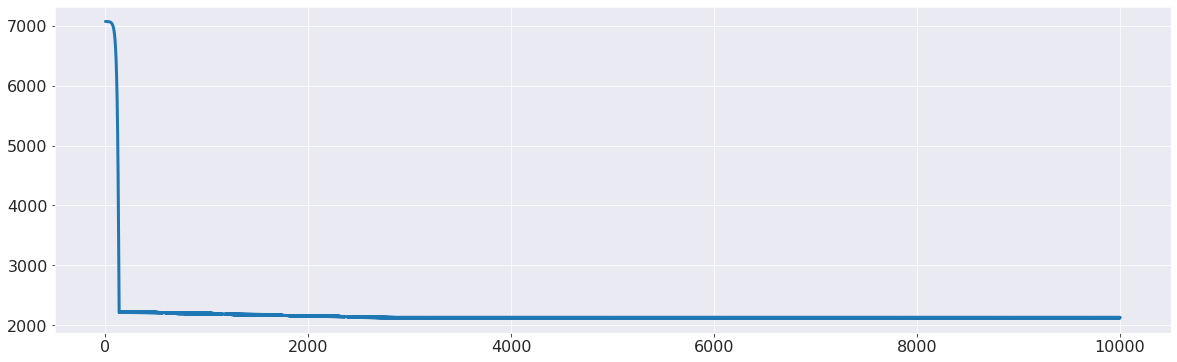

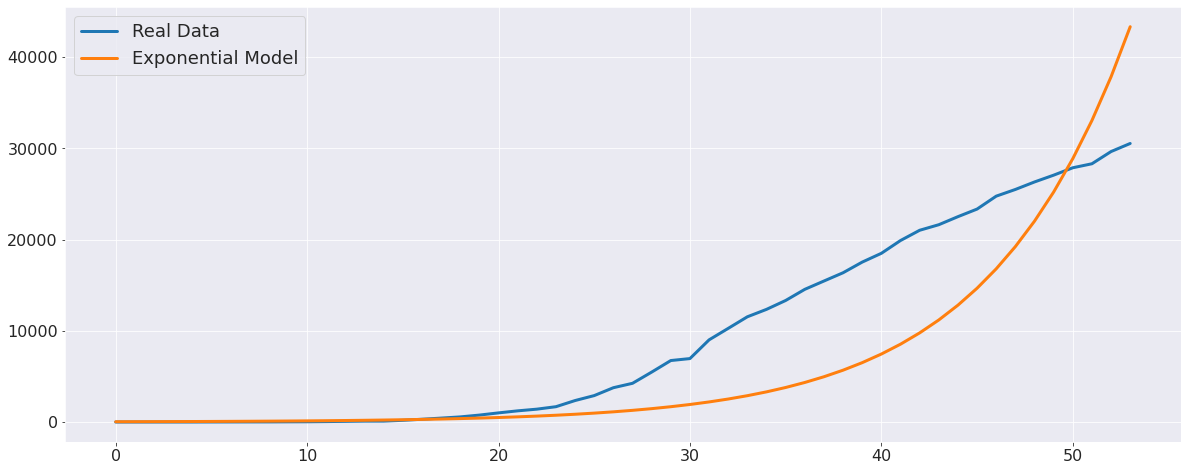

In [214]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.plot(global_mem)


best_set = {'A':1.145, 'B':-25.85}
def function(x):
    return best_set['A']**(x-best_set['B'])

plt.figure(figsize=(20,8))
plt.plot(x1,y1,label='Real Data')
plt.plot(x1,[function(i) for i in x1],label='Exponential Model')
plt.legend()

100%|██████████| 2000/2000 [00:31<00:00, 63.96trial/s, best loss: 76384.62272176672]
{'a': 1.157244015150939, 'b': -2.8573512029003982, 'case': 0}
('case 2', 1.157244015150939, -2.8573512029003982)


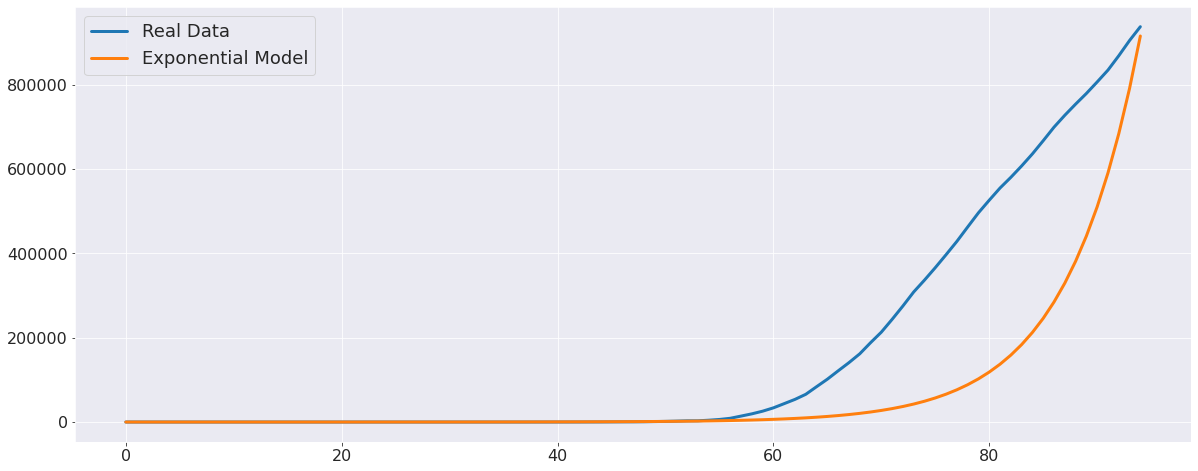

In [221]:
# !pip install hyperopt
# define an objective function
# def objective(args):
#     case, val = args
#     if case == 'case 1':
#         return val
#     else:
#         return val ** 2

from sklearn.metrics import mean_squared_error, mean_absolute_error

def objective(args):
    _,a,b= args
    error = 0
    for e,index in enumerate(x):
        error += abs((a**(x[index]-b)) - (y[index]))
#         error += abs((x[index]*a**(e/len(x))) - (y[index]))
#         error += abs((a**(x[index])) - (y[index]))
      
                    
#     error = mean_squared_error(x,y)
    return error / len(x)

# define a search space
from hyperopt import hp
space = hp.choice('case',
    [
#         ('case 1', 1 + hp.lognormal('c1', 0, 1)),
        ('case 2', hp.uniform('a', 1, 2), 
         hp.uniform('b', -3, 3))
#          hp.uniform('c', -5, 5),          
#          hp.uniform('d', -5, 5))
    ])
# x[x != 0]

# raise
# minimize the objective over the space
from hyperopt import fmin, tpe, space_eval, rand
best = fmin(objective, space, algo=tpe.suggest, max_evals=2000)

print(best)
# -> {'a': 1, 'c2': 0.01420615366247227}
print(space_eval(space, best))
# -> ('case 2', 0.01420615366247227}

best['b']=0
best_set = {'A':best['a'], 'B':best['b']}
def function(x):
    return best_set['A']**(x-best_set['B'])

plt.figure(figsize=(20,8))
plt.plot(x,y,label='Real Data')
plt.plot(x,[function(i) for i in x],label='Exponential Model')
plt.legend()

# print(dir(tpe))